In [0]:
!pip install tensorflow-gpu


2.1.0


In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print (tf.__version__)

2.1.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images.shape

(60000, 28, 28)

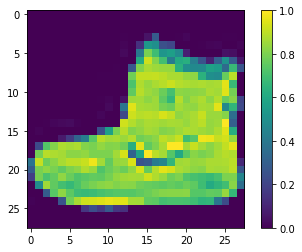

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

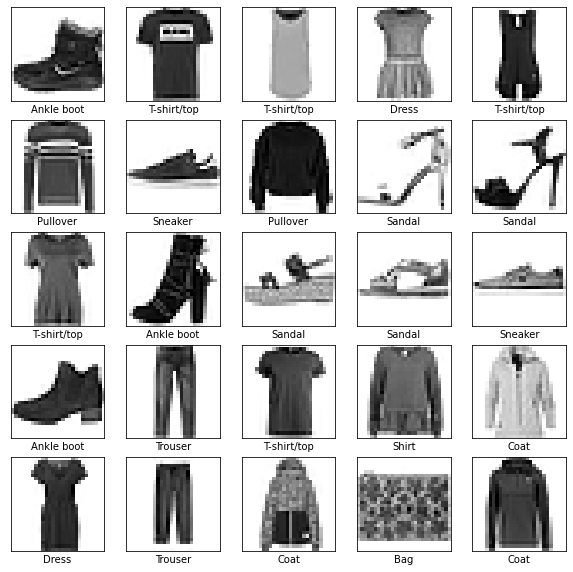

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
width = train_images.shape[1]
height = train_images.shape[2]

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(width, height)),
    keras.layers.Dense(128, activation='relu'),
    # keras.layers.Dense(32, activation = 'relu')
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [72]:
history = model.fit(train_images, train_labels, batch_size = 64, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3055 - accuracy: 0.8891
Epoch 2/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2917 - accuracy: 0.8943
Epoch 3/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2830 - accuracy: 0.8981
Epoch 4/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2738 - accuracy: 0.9001
Epoch 5/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2653 - accuracy: 0.9038
Epoch 6/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2562 - accuracy: 0.9064
Epoch 7/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2489 - accuracy: 0.9098
Epoch 8/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2436 - accuracy: 0.9118
Epoch 9/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2341 - accuracy: 0.9142
Epoch 10/20
60

In [73]:
prediction = model.predict(test_images)
total = 0
correct = 0
wrong = 0
prediction_labels = []

for index in range(len(prediction)):
  current_prediction = prediction[index].tolist().index(max(prediction[index]))
  prediction_labels.append(current_prediction)
  total = total + 1
  if (current_prediction == test_labels[index]):
    correct = correct + 1
  else:
    wrong = wrong + 1

print("Total : " + str(total))
print("Correct : " + str(correct))
print("Wrong : " + str(wrong))

Total : 10000
Correct : 8841
Wrong : 1159
